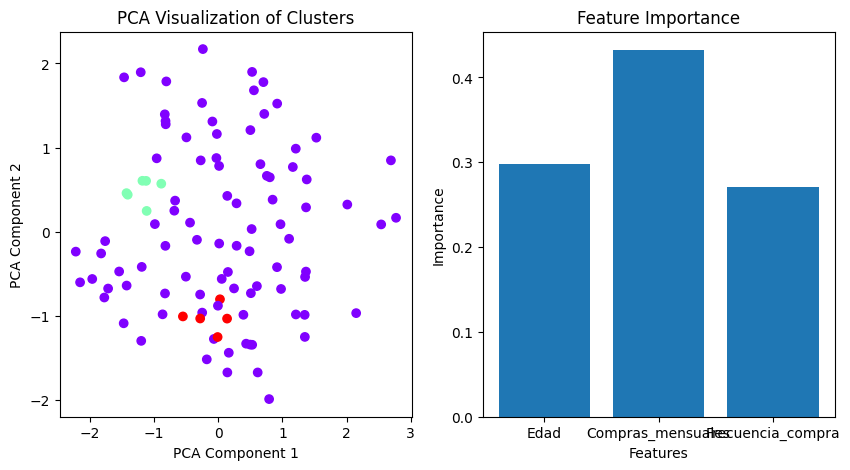

In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [ ]:
np.random.seed(0)
data = {
    'Edad': np.random.randint(20, 70, 100),
    'Compras_mensuales': np.random.randint(100, 10000, 100),
    'Frecuencia_compra': np.random.randint(1, 30, 100),
    'Genero': np.random.choice(['Masculino', 'Femenino'], 100),
    'Ubicacion': np.random.choice(['Ciudad A', 'Ciudad B', 'Ciudad C'], 100),
}

df = pd.DataFrame(data)

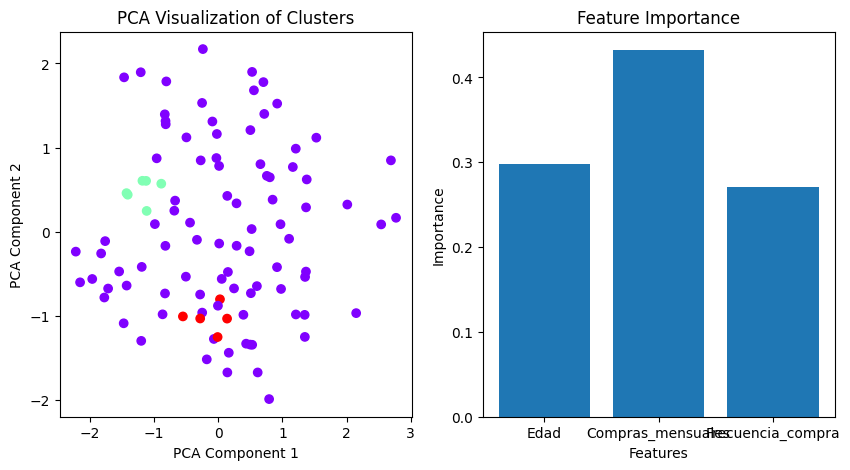

In [3]:
# Escalamiento de datos para que todos los parametros aporten lo mismo
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df[['Edad', 'Compras_mensuales', 'Frecuencia_compra']])

# Clusterización avanzada con DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
df['Grupo'] = dbscan.fit_predict(X_scaled)

# Validación de clustering
# (Puedes utilizar índices de validación de clustering, como la silueta o el índice Davies-Bouldin)

# Análisis de características importantes con Random Forest
features = ['Edad', 'Compras_mensuales', 'Frecuencia_compra']
target = 'Grupo'
rf = RandomForestClassifier(n_estimators=100, random_state=0)
rf.fit(X_scaled, df[target])
feature_importances = pd.DataFrame({'Feature': features, 'Importance': rf.feature_importances_})

# Reducción de dimensionalidad con PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Visualización avanzada
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=df['Grupo'], cmap='rainbow')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('PCA Visualization of Clusters')

plt.subplot(1, 2, 2)
plt.bar(feature_importances['Feature'], feature_importances['Importance'])
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance')

plt.show()